# This program generate figure 10

In [1]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

# 1. Load data 

In [2]:
prod2000_60x60=np.load('/media/Data1/Climada/isimip3/originalcode/code/ipynb/prod2000_60x60.npy')
prod2005_60x60=np.load('/media/Data1/Climada/isimip3/originalcode/code/ipynb/prod2005_60x60.npy')
prod2010_60x60=np.load('/media/Data1/Climada/isimip3/originalcode/code/ipynb/prod2010_60x60.npy')

irrigated_maize_prod2000_60x60=np.load('/media/Data1/Climada/isimip3/originalcode/code/ipynb/irrigated_maize_prod2000_60x60.npy')
irrigated_maize_prod2005_60x60=np.load('/media/Data1/Climada/isimip3/originalcode/code/ipynb/irrigated_maize_prod2005_60x60.npy')
irrigated_maize_prod2010_60x60=np.load('/media/Data1/Climada/isimip3/originalcode/code/ipynb/irrigated_maize_prod2010_60x60.npy')

# convert nan to 0
prod2000_60x60=np.nan_to_num(prod2000_60x60)
prod2005_60x60=np.nan_to_num(prod2005_60x60)
prod2010_60x60=np.nan_to_num(prod2010_60x60)
irrigated_maize_prod2000_60x60[irrigated_maize_prod2000_60x60<0]=0
irrigated_maize_prod2005_60x60[irrigated_maize_prod2005_60x60<0]=0
irrigated_maize_prod2010_60x60[irrigated_maize_prod2010_60x60<0]=0
#important: without this step, all nan will transfer to all
irrigated_maize_prod2000_60x60=np.nan_to_num(irrigated_maize_prod2000_60x60)
irrigated_maize_prod2005_60x60=np.nan_to_num(irrigated_maize_prod2005_60x60)
irrigated_maize_prod2010_60x60=np.nan_to_num(irrigated_maize_prod2010_60x60)
# calculate 3-year averages
all_prod2000_60x60=prod2000_60x60+irrigated_maize_prod2000_60x60
all_prod2005_60x60=prod2005_60x60+irrigated_maize_prod2005_60x60
all_prod2010_60x60=prod2010_60x60+irrigated_maize_prod2010_60x60
average_rainfed=(prod2000_60x60+prod2005_60x60+prod2010_60x60)/3
average_irrigated=(irrigated_maize_prod2000_60x60+irrigated_maize_prod2005_60x60+irrigated_maize_prod2010_60x60)/3
average_all=(all_prod2000_60x60+all_prod2005_60x60+all_prod2010_60x60)/3
np.save('average_all.npy',average_all)
np.save('average_rained.npy',average_rainfed)
np.save('average_irrigated.npy',average_irrigated)

In [3]:
np.nansum(irrigated_maize_prod2000_60x60)

23791787.707595274

In [4]:
np.nansum(prod2000_60x60)

216812966.26389402

In [5]:
average_rainfed

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [2135.09997654,  533.46667035, 4976.30000496, ...,    0.        ,
           0.        ,    0.        ],
       [ 348.66666746,  388.69999933, 2113.93337949, ...,    0.        ,
           0.        ,    0.        ],
       [ 597.43334579, 1903.6666495 , 3809.73335393, ...,    0.        ,
           0.        ,    0.        ]])

In [6]:
irrigated_maize_prod2010_60x60

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [2990.00000191,  500.99999905, 1020.60000515, ...,    0.        ,
           0.        ,    0.        ],
       [  49.        ,   53.80000019, 1136.4999876 , ...,    0.        ,
           0.        ,    0.        ],
       [ 562.09999275,  715.99999809, 3291.7000103 , ...,    0.        ,
           0.        ,    0.        ]])

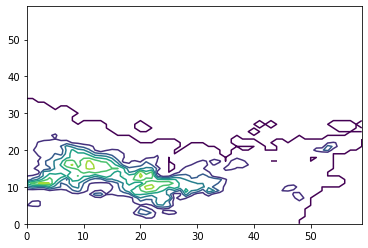

In [7]:
plt.contour(np.flipud(average_all))
average_all[average_all<0]=np.nan

In [8]:
#plt.contour(np.flipud(areainsqmeter[:30,:]))

In [9]:
[np.nanmin(average_all), np.nanmax(average_all)]

[0.0, 1383751.9262981415]

In [10]:
min_lon = -100 
min_lat = 35
max_lon = -70
max_lat = 65

In [11]:

fn1 = '/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp126_ensemble_mean.nc4'
ds=xr.open_dataset(fn1)
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))

#these data are change in % relative to average for the period of 1983 to 2013
averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
#theoritically the average values for the reference periods are 100s at all grid points
averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years')+100
averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years')+100
averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years')+100
#We convert the data as change relative to the period from 1996 to 2015 for consistent to our paper's reference
averages2050s_ssp126=(averages2040_2069/averages1996_2015-1)*average_all
averages2080s_ssp126=(averages2070_2099/averages1996_2015-1)*average_all

In [12]:
fn1 = '/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp370_ensemble_mean.nc4'
#ds=xr.open_dataset(fn1,decode_times=False)
ds=xr.open_dataset(fn1)
#select data in space
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
#select and  average data in time
#these data are change in % relative to average for the period of 1983 to 2013
averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
#theoritically the average values for the reference periods are 100s at all grid points
averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years')+100 #note data is 1995-2014
averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years')+100
averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years')+100
averages2050s_ssp370=(averages2040_2069/averages1996_2015-1)*average_all
averages2080s_ssp370=(averages2070_2099/averages1996_2015-1)*average_all

In [13]:
fn1 = '/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp585_ensemble_mean.nc4'
#ds=xr.open_dataset(fn1,decode_times=False)
ds=xr.open_dataset(fn1)
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
#these data are change in % relative to average for the period of 1983 to 2013
averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
#theoritically the average values for the reference periods are 100s at all grid points
averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years')+100
averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years')+100
averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years')+100
averages2050s_ssp585=(averages2040_2069/averages1996_2015-1)*average_all
averages2080s_ssp585=(averages2070_2099/averages1996_2015-1)*average_all

In [14]:
averages2080s_ssp585

<xarray.Dataset>
Dimensions:       (lon: 60, lat: 60)
Coordinates:
  * lon           (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat           (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
Data variables:
    yield change  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [15]:
average_all.shape

(60, 60)

In [16]:
#check if the original reference is 1983-2013
[averages1983_2013.squeeze().min(),averages1983_2013.squeeze().max()]

[<xarray.Dataset>
 Dimensions:       ()
 Data variables:
     yield change  float64 99.48,
 <xarray.Dataset>
 Dimensions:       ()
 Data variables:
     yield change  float64 100.1]

In [17]:
fn26='/media/Data1/Climada/isimip3/nc4/Jaegermeyr_etal_2021_GGCMI-CMIP6_ensemble_yield_change_map_rcp26_Maize.nc4'
fn85='/media/Data1/Climada/isimip3/nc4/Jaegermeyr_etal_2021_GGCMI-CMIP6_ensemble_yield_change_map_rcp85_Maize.nc4'

In [18]:
ds=xr.open_dataset(fn26)
#select data in space
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))

In [19]:
cropped_ds

<xarray.Dataset>
Dimensions:          (lon: 60, lat: 60)
Coordinates:
  * lon              (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat              (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
Data variables:
    Yield change     (lat, lon) float32 ...
    Model agreement  (lat, lon) float32 ...

In [20]:
ds=xr.open_dataset(fn85)
#select data in space
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))

## 5. Uncertainty analysis

In [21]:
#these txt file are in the data folder in github site
fns126=['/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_gfdl-esm4_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_ipsl-cm6a-lr_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_mpi-esm1-2-hr_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_mri-esm2-0_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_ukesm1-0-ll_files.txt']
fns585=['/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_gfdl-esm4_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_ipsl-cm6a-lr_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_mpi-esm1-2-hr_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_mri-esm2-0_files.txt',
'/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_ukesm1-0-ll_files.txt']

In [22]:
fns126

['/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_gfdl-esm4_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_ipsl-cm6a-lr_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_mpi-esm1-2-hr_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_mri-esm2-0_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp126_ukesm1-0-ll_files.txt']

In [23]:
fns585

['/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_gfdl-esm4_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_ipsl-cm6a-lr_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_mpi-esm1-2-hr_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_mri-esm2-0_files.txt',
 '/media/Data1/Climada/isimip3/GGCMI_Phase3_annual_ssp585_ukesm1-0-ll_files.txt']

In [24]:
gfdl126fns=pd.read_csv(fns126[0], header=None)

In [25]:
gfdl126fns[0]

0         GGCMI_Phase3_annual_ssp126_gfdl-esm4_acea.nc4
1       GGCMI_Phase3_annual_ssp126_gfdl-esm4_crover.nc4
2     GGCMI_Phase3_annual_ssp126_gfdl-esm4_cygma1p74...
3     GGCMI_Phase3_annual_ssp126_gfdl-esm4_dssat-pyt...
4     GGCMI_Phase3_annual_ssp126_gfdl-esm4_epic-iias...
5         GGCMI_Phase3_annual_ssp126_gfdl-esm4_isam.nc4
6        GGCMI_Phase3_annual_ssp126_gfdl-esm4_ldndc.nc4
7        GGCMI_Phase3_annual_ssp126_gfdl-esm4_lpjml.nc4
8       GGCMI_Phase3_annual_ssp126_gfdl-esm4_pdssat.nc4
9        GGCMI_Phase3_annual_ssp126_gfdl-esm4_pepic.nc4
10      GGCMI_Phase3_annual_ssp126_gfdl-esm4_promet.nc4
11    GGCMI_Phase3_annual_ssp126_gfdl-esm4_simplace-...
Name: 0, dtype: object

In [26]:
average126_2050s=np.empty((5,12,60,60))
average126_2080s=np.empty((5,12,60,60))
for j in range(5):  #5 models
    fnfns=fns126[j]
    fns=pd.read_csv(fnfns, header=None)
    for i in range(12):
        fn='/media/Data1/Climada/isimip3/nc4/'+fns[0][i]
        print(fn)
        ds=xr.open_dataset(fn)
    #select data in space
        cropped_ds0 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon)) 
        cropped_ds=cropped_ds0['yield change'][0]
        #these data are change in % relative to average for the period of 1983 to 2013
        #averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
        #theoritically the average values for the reference periods are 100s at all grid points
        
        #note the reference period changed to 1995 to  2014 but the variable name not change for convinience
        #because I don't want to affect other parts of the code
        averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years',skipna=True)+100
        averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years',skipna=True)+100
        averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years',skipna=True)+100
        #We convert the data as change relative to the period from 1996 to 2015 for consistent to our paper's reference
        averages2050s_ssp126=(averages2040_2069/averages1996_2015-1)
        averages2080s_ssp126=(averages2070_2099/averages1996_2015-1)
        average126_2050s[j,i,:,:]=averages2050s_ssp126*average_all  
        average126_2080s[j,i,:,:]=averages2080s_ssp126*average_all
    

/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_acea.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_crover.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_cygma1p74.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_dssat-pythia.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_epic-iiasa.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_isam.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_ldndc.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_lpjml.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_pdssat.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_pepic.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_promet.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_simplace-lintul5.nc4
/media/Data1

In [27]:
average585_2050s=np.empty((5,12,60,60))
average585_2080s=np.empty((5,12,60,60))
for j in range(5):  #5 models
    fnfns=fns585[j]
    fns=pd.read_csv(fnfns, header=None)
    for i in range(12):
        fn='/media/Data1/Climada/isimip3/nc4/'+fns[0][i]
        print(fn)
        ds=xr.open_dataset(fn)
    #select data in space
        cropped_ds0 = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon)) 
        cropped_ds=cropped_ds0['yield change'][0]
        #these data are change in % relative to average for the period of 1983 to 2013
        averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years',skipna=True)+100
        #theoritically the average values for the reference periods are 100s at all grid points
        
        
        # note the reference period has changed to 1995-2014 but variable name not changed for convinience
        averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years',skipna=True)+100
        
        
        averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years',skipna=True)+100
        averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years',skipna=True)+100
        #We convert the data as change relative to the period from 1996 to 2015 for consistent to our paper's reference
        averages2050s_ssp585=(averages2040_2069/averages1996_2015-1)
        averages2080s_ssp585=(averages2070_2099/averages1996_2015-1)
        average585_2050s[j,i,:,:]=np.array(averages2050s_ssp585)*average_all
        average585_2080s[j,i,:,:]=np.array(averages2080s_ssp585)*average_all

/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_acea.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_crover.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_cygma1p74.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_dssat-pythia.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_epic-iiasa.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_isam.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_ldndc.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_lpjml.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_pdssat.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_pepic.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_promet.nc4
/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp585_gfdl-esm4_simplace-lintul5.nc4
/media/Data1

In [28]:
mm=np.nanmean(np.nanmean(average126_2080s,axis=0),axis=0)


In [29]:
average126_2080s.shape

(5, 12, 60, 60)

In [31]:
#here all value are set to 1.0
prod_1996_2015=average_all
ref_prod=np.nansum(np.nansum(prod_1996_2015[:,24:],0),0)

ref_prod

68972907.392856

In [32]:
sum126_2050s=np.nansum(np.nansum(average126_2050s[:,:,:,24:],2),2).flatten()
sum126_2080s=np.nansum(np.nansum(average126_2080s[:,:,:,24:],2),2).flatten()
sum585_2050s=np.nansum(np.nansum(average585_2050s[:,:,:,24:],2),2).flatten()
sum585_2080s=np.nansum(np.nansum(average585_2080s[:,:,:,24:],2),2).flatten()

In [33]:
pp=[np.nanmean(sum126_2050s),np.nanmean(sum126_2080s),np.nanmean(sum585_2050s),np.nanmean(sum585_2080s)]/ref_prod

In [34]:
pp*100

array([ -4.59673423,  -5.40300926, -11.05961435, -22.93551927])

In [35]:
pp*ref_prod

array([ -3170501.24280974,  -3726612.57539171,  -7628137.56283538,
       -15819294.46337523])

In [36]:
sum126_2050s.shape

(60,)

In [37]:
averages1996_2015.shape

(60, 60)

In [38]:
average_all.shape

(60, 60)

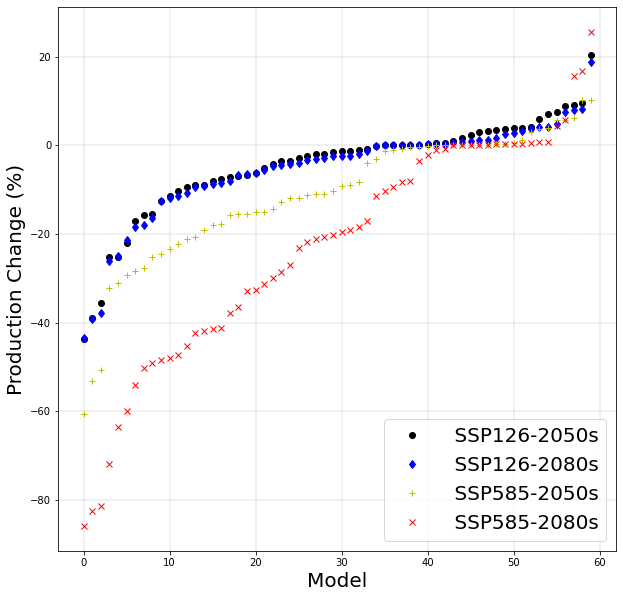

In [39]:
fig = plt.figure(figsize=(10,10))

xx=np.array(np.reshape(np.array(range(60)),newshape=(60,1)))
yy=np.array(np.reshape(np.sort(sum126_2050s)/ref_prod*100,newshape=(60,1)))
plt.plot(xx,yy,'ok',label=' SSP126-2050s')
plt.plot(xx,np.sort(sum126_2080s)/ref_prod*100,'db',label=' SSP126-2080s')
plt.plot(xx,np.sort(sum585_2050s)/ref_prod*100,'+y',label=' SSP585-2050s')
plt.plot(xx,np.sort(sum585_2080s)/ref_prod*100,'xr',label=' SSP585-2080s')
plt.legend(numpoints=3)
plt.legend(loc="lower right",fontsize=20)
plt.xlabel('Model',fontsize=20)
plt.ylabel('Production Change (%)',fontsize=20)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
fig.savefig('Figure_10_SSP126_SSP585_ProductionChange_model.png',dpi=150)